## Ejercicio de Clustering y Regression

Utilizando el dataset de **`FuelConsumptionCo2.csv`**:

**Parte 1**:
1. Realiza un **`Exploratory Data Analysis`** (**EDA**).
2. Realiza **preprocesamiento**.
3. Utilizando métodos de **clustering**, **¿existe alguna forma de "categorizar" los datos?**
4. Selecciona un número de **clusters "optimo"** y crea una columna con la categorización dada por el clustering.
5. Teniendo el conjunto separado en diferentes "clases" o "categorias", **realiza una regresion lineal (`LinearRegression`) para cada conjunto**.
6. Recuerda hacer **`train_test_split`** para poder calcular métricas, agrega la metrica **`r^2 ajustado`**.
7. Haz el método de validación más adecuado para los datos, **solo es necesario hacer uno para cada modelo**.
8. Guarda los modelos en un archivos binario.

**Parte 2**:
1. Investiga sobre otros modelos de regresión e implementalos con este dataset.
2. Compara las métricas de estos nuevos modelos con el anterior (**`LinearRegression`**).
3. En caso de que el modelo lo permita, haz **tunning** al modelo usando **`GridSearchCV`**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regresores
from sklearn.linear_model import LinearRegression

# Validacion
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


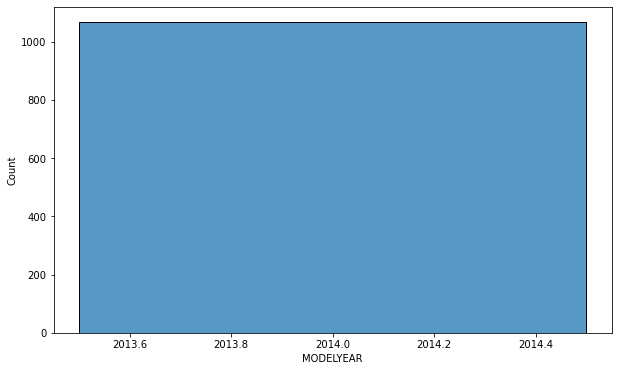

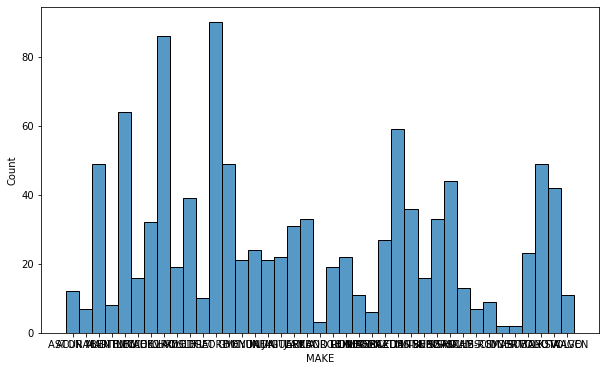

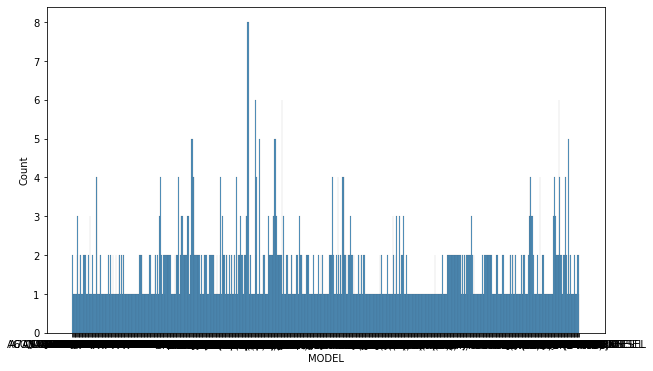

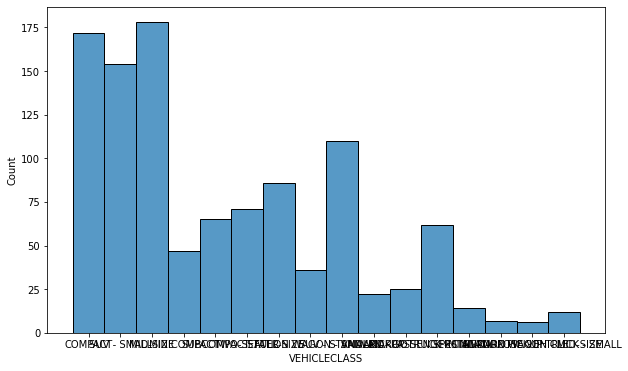

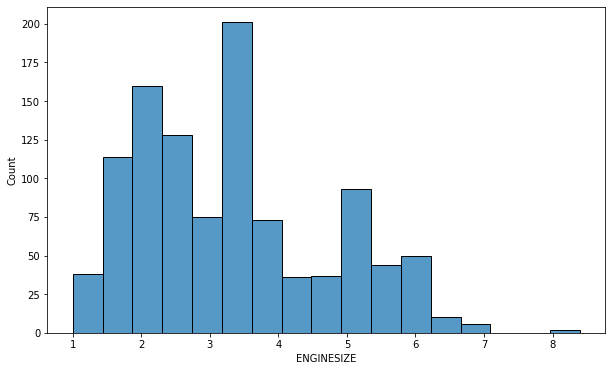

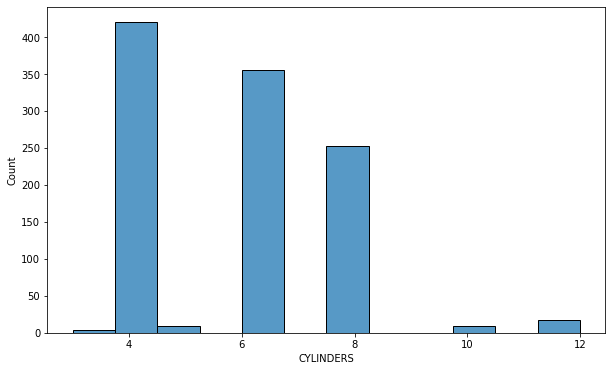

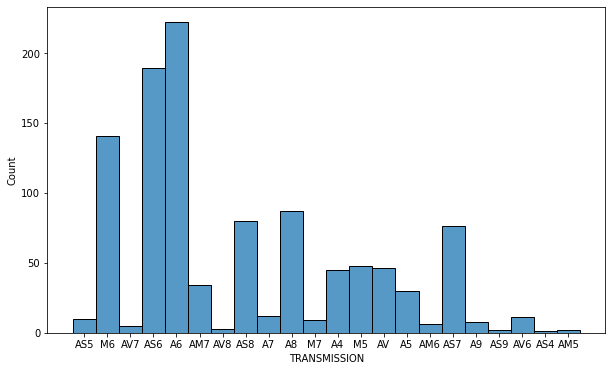

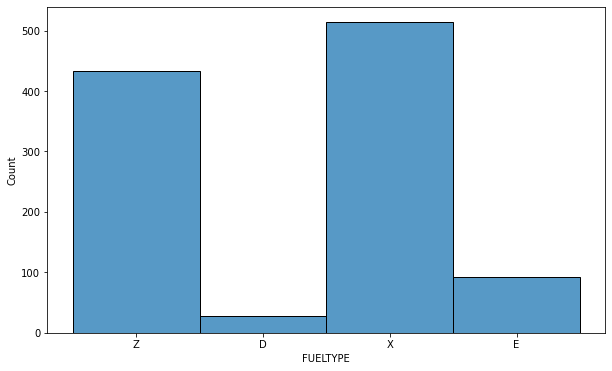

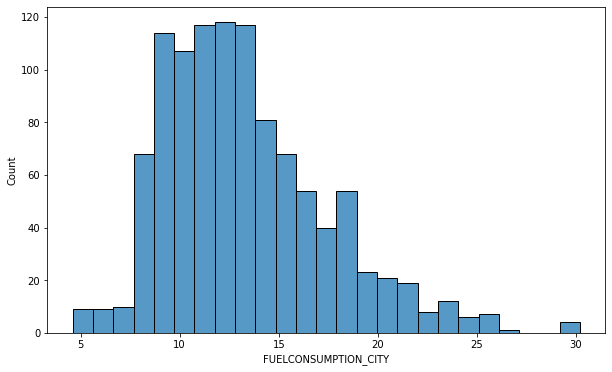

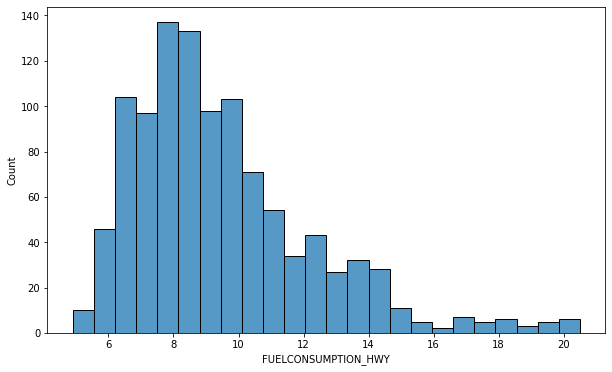

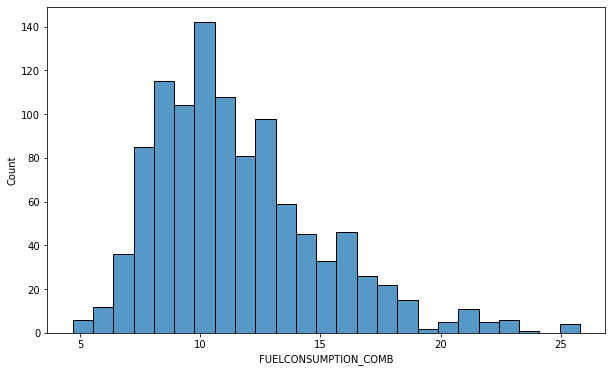

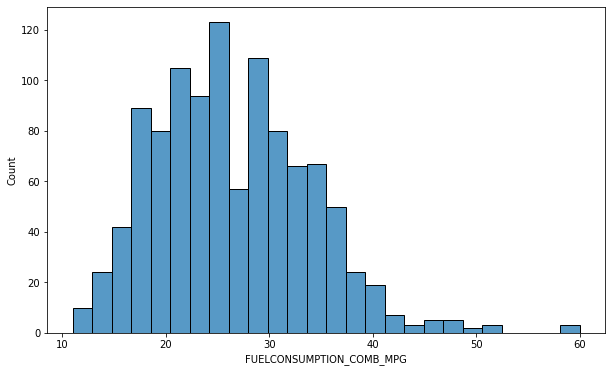

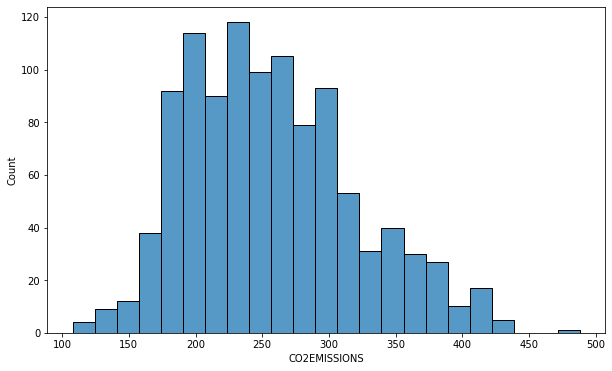

In [4]:
#bucle de las columnas haciendo grafico



for i in df.columns:
    plt.figure(figsize = (10, 6))
    sns.histplot(df[i])
    plt.show()


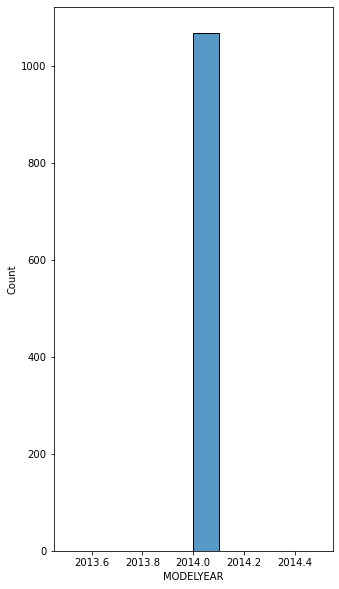

In [5]:
plt.figure(figsize = (5, 10))
sns.histplot(df["MODELYEAR"], bins = 10)
plt.show()

In [6]:
df["MODEL"].value_counts()

F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50                      1
SONATA HYBRID LIMITED    1
SONATA HYBRID            1
XC90 AWD                 1
Name: MODEL, Length: 663, dtype: int64

In [7]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')>

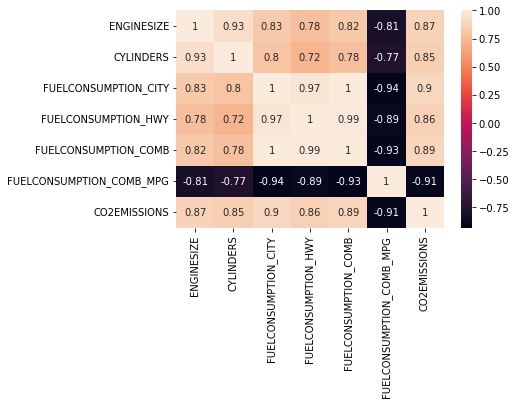

In [8]:
sns.heatmap(data = df[df.drop("MODELYEAR", axis = 1).columns.to_list()].corr(), annot = True)
plt.show()

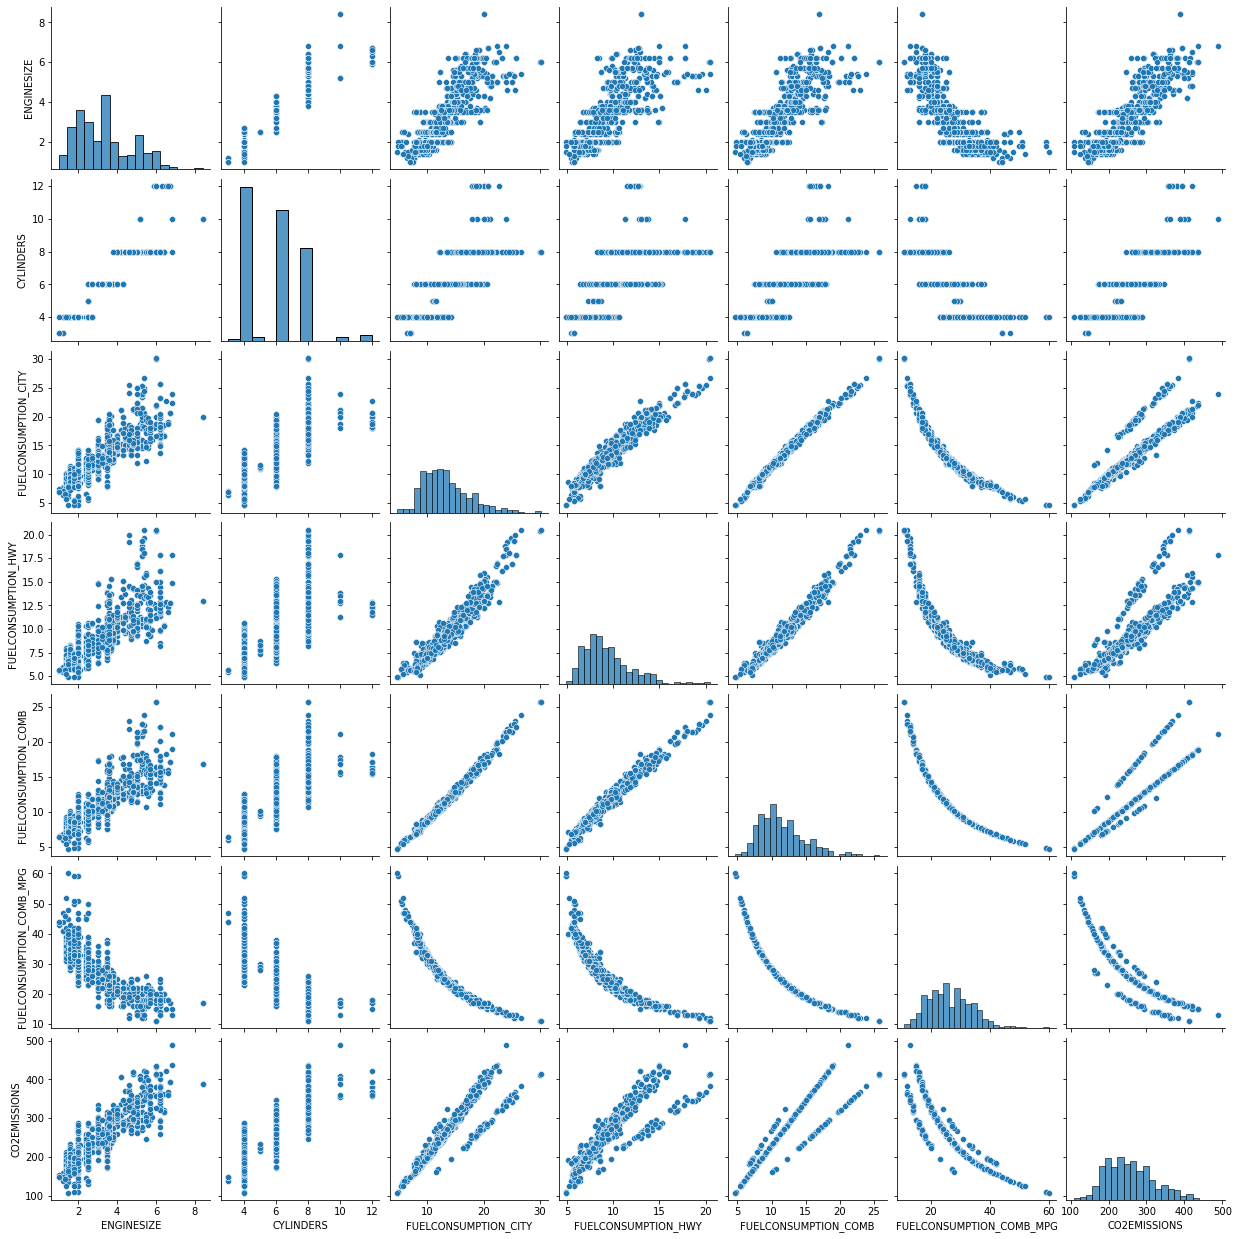

In [9]:
sns.pairplot(df.drop("MODELYEAR", axis = 1))
plt.show()

PREPROCESAMIENTO


In [10]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [11]:
df.drop("MODELYEAR", axis = 1, inplace= True)

In [12]:
df_num = df._get_numeric_data().copy()

df_num.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136


In [13]:
df_cat = df.drop(df_num.columns, axis = 1)

df_cat.head(3)

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z


In [14]:
dict_class = {y:x.split(" - ")[0] for x, y in zip (df["VEHICLECLASS"].unique(), df["VEHICLECLASS"].unique())}

In [15]:
df_cat["VEHICLECLASS"] = df_cat["VEHICLECLASS"].map(dict_class)


df_cat.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV,AS6,Z
4,ACURA,RDX AWD,SUV,AS6,Z


In [16]:
df_cat["VEHICLECLASS"].value_counts()

SUV                        264
MID-SIZE                   178
COMPACT                    172
FULL-SIZE                   86
PICKUP TRUCK                74
TWO-SEATER                  71
SUBCOMPACT                  65
MINICOMPACT                 47
VAN                         47
STATION WAGON               42
MINIVAN                     14
SPECIAL PURPOSE VEHICLE      7
Name: VEHICLECLASS, dtype: int64

In [17]:
dict_class = {"SUBCOMPACT":"COMPACT", "MINICOMPACT":"COMPACT","MINIVAN":"VAN"}
df_cat["VEHICLECLASS"] = df_cat["VEHICLECLASS"].replace(dict_class)

df_cat.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV,AS6,Z
4,ACURA,RDX AWD,SUV,AS6,Z


In [18]:
df_cat["TRANSMISSION"].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [19]:
df_cat["TRANSMISSION"] = df_cat["TRANSMISSION"].apply(lambda x : "AV0" if x == "AV" else x)
df_cat["TRANSMISSION"].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV0     46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [20]:
df_cat["MARCHAS"] = df_cat["TRANSMISSION"].apply(lambda x : x [-1])

In [21]:
df_cat["TRANSMISSION"] = df_cat["TRANSMISSION"].apply(lambda x : x [:-1])

In [22]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["VEHICLECLASS"], prefix = "VEHICLECLASS")], axis = 1)

df_cat

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN
0,ACURA,ILX,COMPACT,AS,Z,5,1,0,0,0,0,0,0,0,0
1,ACURA,ILX,COMPACT,M,Z,6,1,0,0,0,0,0,0,0,0
2,ACURA,ILX HYBRID,COMPACT,AV,Z,7,1,0,0,0,0,0,0,0,0
3,ACURA,MDX 4WD,SUV,AS,Z,6,0,0,0,0,0,0,1,0,0
4,ACURA,RDX AWD,SUV,AS,Z,6,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV,AS,X,6,0,0,0,0,0,0,1,0,0
1063,VOLVO,XC60 AWD,SUV,AS,X,6,0,0,0,0,0,0,1,0,0
1064,VOLVO,XC70 AWD,SUV,AS,X,6,0,0,0,0,0,0,1,0,0
1065,VOLVO,XC70 AWD,SUV,AS,X,6,0,0,0,0,0,0,1,0,0


In [23]:
df_cat.drop(["VEHICLECLASS", "MAKE", "MODEL"], axis = 1, inplace= True)
df_cat

,TRANSMISSION,FUELTYPE,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN
0,AS,Z,5,1,0,0,0,0,0,0,0,0
1,M,Z,6,1,0,0,0,0,0,0,0,0
2,AV,Z,7,1,0,0,0,0,0,0,0,0
3,AS,Z,6,0,0,0,0,0,0,1,0,0
4,AS,Z,6,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,AS,X,6,0,0,0,0,0,0,1,0,0
1063,AS,X,6,0,0,0,0,0,0,1,0,0
1064,AS,X,6,0,0,0,0,0,0,1,0,0
1065,AS,X,6,0,0,0,0,0,0,1,0,0


In [24]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["TRANSMISSION"], prefix = "TRANSMISSION")], axis = 1)
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["FUELTYPE"], prefix = "FUELTYPE")], axis = 1)
df_cat

,TRANSMISSION,FUELTYPE,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,...,VEHICLECLASS_VAN,TRANSMISSION_A,TRANSMISSION_AM,TRANSMISSION_AS,TRANSMISSION_AV,TRANSMISSION_M,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,AS,Z,5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,M,Z,6,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,AV,Z,7,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,AS,Z,6,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,AS,Z,6,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,AS,X,6,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1063,AS,X,6,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1064,AS,X,6,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1065,AS,X,6,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_cat.drop(["TRANSMISSION", "FUELTYPE"], axis=1, inplace=True)
df_cat

,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN,TRANSMISSION_A,TRANSMISSION_AM,TRANSMISSION_AS,TRANSMISSION_AV,TRANSMISSION_M,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1063,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1064,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1065,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [26]:
df_num.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136


In [27]:
df_num[df["ENGINESIZE"] < 7]["ENGINESIZE"].value_counts()

2.0    158
3.6     92
3.5     83
3.0     75
1.6     65
2.4     61
2.5     56
5.3     48
5.0     39
1.8     37
3.7     35
6.2     32
1.4     30
4.0     22
4.4     20
4.7     17
3.8     16
5.7     16
6.0     14
5.5     14
3.4     12
1.5     12
2.7     11
4.6     10
4.8     10
4.3     10
3.2      9
5.4      8
5.6      6
5.2      6
4.2      6
3.3      5
6.4      5
1.2      4
6.7      4
1.0      3
5.9      3
6.6      3
6.8      2
2.1      2
5.8      1
6.5      1
6.3      1
1.3      1
Name: ENGINESIZE, dtype: int64

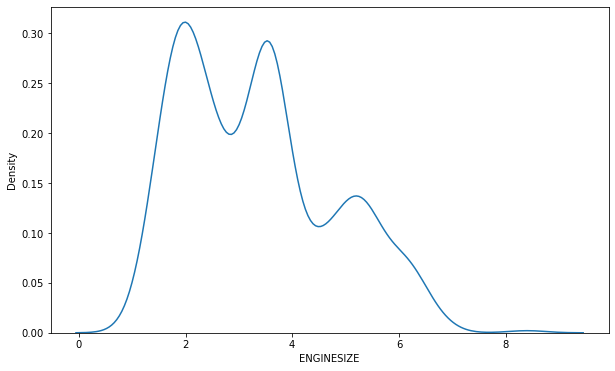

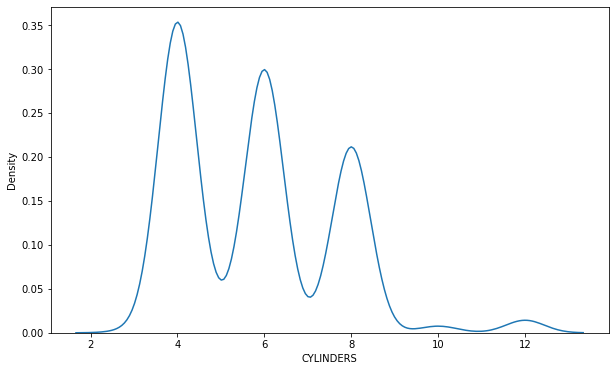

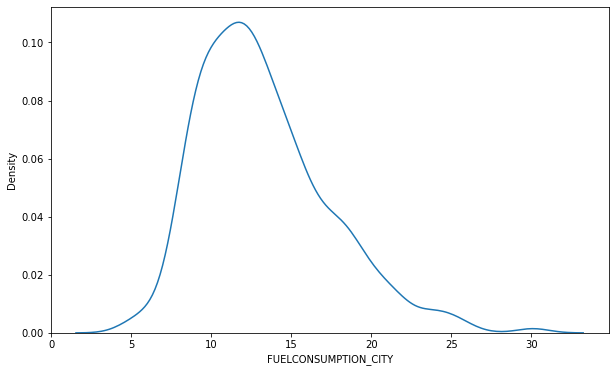

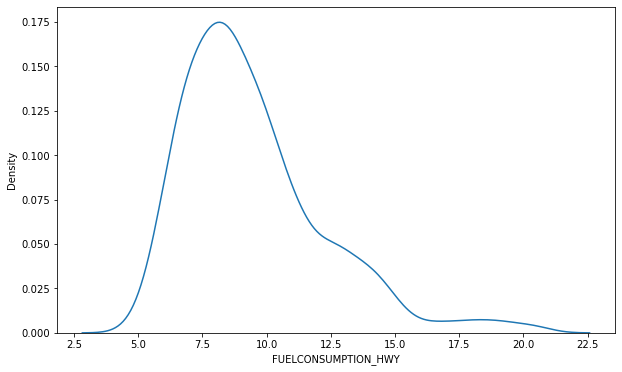

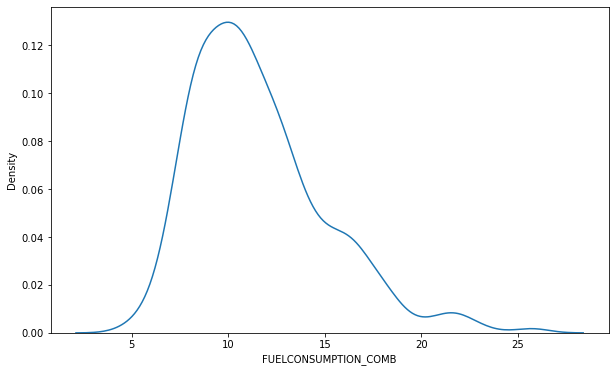

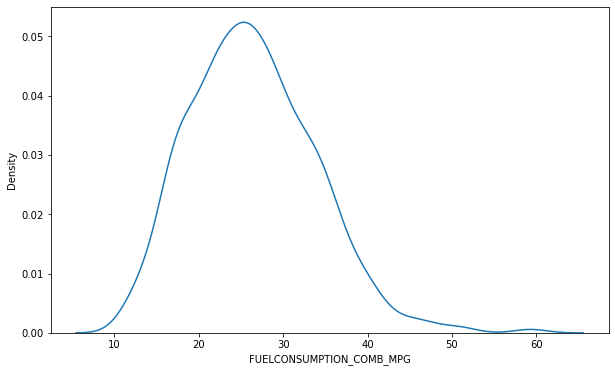

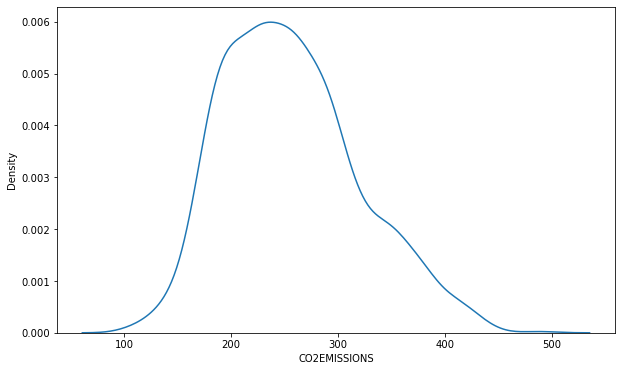

In [28]:
for i in df_num.columns:
    plt.figure(figsize = (10, 6))
    sns.kdeplot(df_num[i])
    plt.show()

In [29]:
df_num.drop("FUELCONSUMPTION_COMB", axis=1, inplace=True)

In [30]:
df_num

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,33,196
1,2.4,4,11.2,7.7,29,221
2,1.5,4,6.0,5.8,48,136
3,3.5,6,12.7,9.1,25,255
4,3.5,6,12.1,8.7,27,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,24,271
1063,3.2,6,13.2,9.5,25,264
1064,3.0,6,13.4,9.8,24,271
1065,3.2,6,12.9,9.3,25,260


In [31]:
df = pd.concat([df_cat, df_num], axis = 1)

In [32]:
df = df[(df["CO2EMISSIONS"] < 450) & (df["FUELCONSUMPTION_COMB_MPG"] < 52)]

In [33]:
df

,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN,...,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,4,9.9,6.7,33,196
1,6,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2.4,4,11.2,7.7,29,221
2,7,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1.5,4,6.0,5.8,48,136
3,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3.5,6,12.7,9.1,25,255
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3.5,6,12.1,8.7,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.0,6,13.4,9.8,24,271
1063,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.2,6,13.2,9.5,25,264
1064,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.0,6,13.4,9.8,24,271
1065,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.2,6,12.9,9.3,25,260


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1066
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MARCHAS                               1062 non-null   object 
 1   VEHICLECLASS_COMPACT                  1062 non-null   uint8  
 2   VEHICLECLASS_FULL-SIZE                1062 non-null   uint8  
 3   VEHICLECLASS_MID-SIZE                 1062 non-null   uint8  
 4   VEHICLECLASS_PICKUP TRUCK             1062 non-null   uint8  
 5   VEHICLECLASS_SPECIAL PURPOSE VEHICLE  1062 non-null   uint8  
 6   VEHICLECLASS_STATION WAGON            1062 non-null   uint8  
 7   VEHICLECLASS_SUV                      1062 non-null   uint8  
 8   VEHICLECLASS_TWO-SEATER               1062 non-null   uint8  
 9   VEHICLECLASS_VAN                      1062 non-null   uint8  
 10  TRANSMISSION_A                        1062 non-null   uint8  
 11  TRANSMISSION_AM  

In [35]:
df.reset_index(drop=True)

,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN,...,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,4,9.9,6.7,33,196
1,6,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2.4,4,11.2,7.7,29,221
2,7,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1.5,4,6.0,5.8,48,136
3,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3.5,6,12.7,9.1,25,255
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3.5,6,12.1,8.7,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.0,6,13.4,9.8,24,271
1058,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.2,6,13.2,9.5,25,264
1059,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.0,6,13.4,9.8,24,271
1060,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.2,6,12.9,9.3,25,260


In [36]:
#Transformamos la curva a una recta

df ["FUELCONSUMPTION_COMB_MPG_2"]= df["FUELCONSUMPTION_COMB_MPG"].apply(lambda x: x**-1)

In [37]:
df.drop("FUELCONSUMPTION_COMB_MPG", axis=1, inplace=True)

In [38]:
df

,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN,...,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG_2
0,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,4,9.9,6.7,196,0.030303
1,6,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2.4,4,11.2,7.7,221,0.034483
2,7,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1.5,4,6.0,5.8,136,0.020833
3,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3.5,6,12.7,9.1,255,0.040000
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,3.5,6,12.1,8.7,244,0.037037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.0,6,13.4,9.8,271,0.041667
1063,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.2,6,13.2,9.5,264,0.040000
1064,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.0,6,13.4,9.8,271,0.041667
1065,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,3.2,6,12.9,9.3,260,0.040000


In [39]:
# Cluster

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [40]:
inercias = list() 
  
for k in range(1, 11): 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)     
    inercias.append(kmeans.inertia_) 
    
inercias

C:\Users\UsuarioM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[4181265.7074597757,
 1394897.657216491,
 646906.4748804629,
 380238.50508237304,
 274976.40215037373,
 195831.6184265986,
 147740.19379822927,
 117205.0193850174,
 96178.4847286376,
 78468.20899456044]

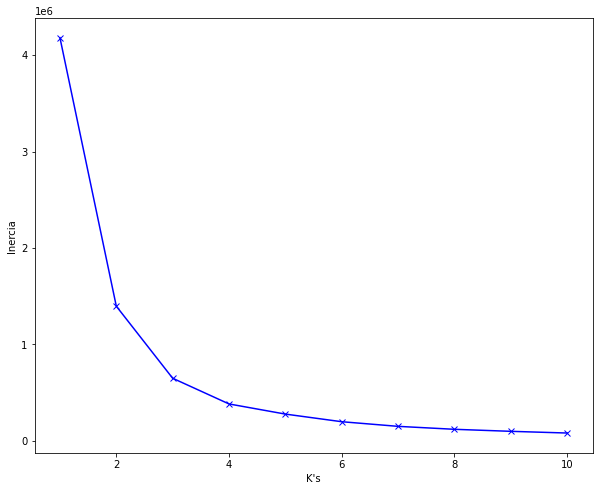

In [41]:
plt.figure(figsize = (10, 8))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

In [42]:
# Cluster

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [43]:
df_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
df_centroides

,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN,...,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG_2
0,5.640371,0.399072,0.041763,0.248260,9.714451e-17,9.280742e-03,0.067285,0.160093,0.069606,0.004640,...,0.041763,0.030162,0.610209,0.317865,2.104176,4.257541,9.840603,7.235963,197.988399,0.030744
1,6.121212,0.121212,0.045455,0.055556,1.414141e-01,-8.673617e-18,0.010101,0.282828,0.111111,0.232323,...,0.005051,0.166667,0.318182,0.510101,5.361111,8.303030,19.127273,13.478788,356.151515,0.058928
2,6.454965,0.198614,0.136259,0.133949,1.062356e-01,6.928406e-03,0.025404,0.321016,0.043880,0.027714,...,0.018476,0.106236,0.424942,0.450346,3.668822,6.184758,14.123326,9.894226,269.295612,0.043315


In [44]:
#Escalar Datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(df)

X

array([[0.55555556, 1.        , 0.        , ..., 0.1038961 , 0.22508039,
        0.15      ],
       [0.66666667, 1.        , 0.        , ..., 0.16883117, 0.30546624,
        0.20862069],
       [0.77777778, 1.        , 0.        , ..., 0.04545455, 0.03215434,
        0.0171875 ],
       ...,
       [0.66666667, 0.        , 0.        , ..., 0.30519481, 0.46623794,
        0.309375  ],
       [0.66666667, 0.        , 0.        , ..., 0.27272727, 0.43086817,
        0.286     ],
       [0.66666667, 0.        , 0.        , ..., 0.33116883, 0.54019293,
        0.3625    ]])

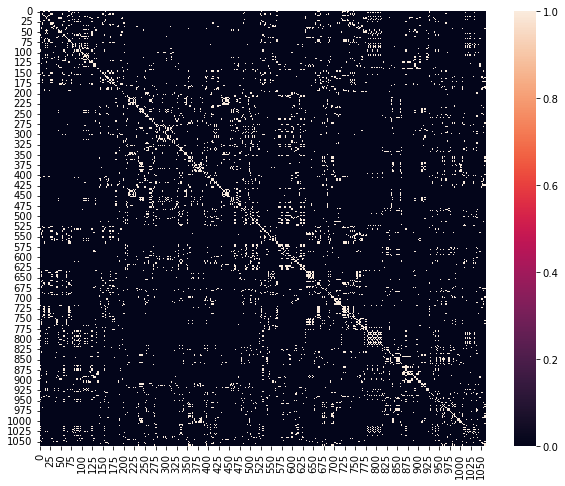

In [45]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2*X.shape[1] - 1)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Plot
plt.figure(figsize = (10, 8))

# Grafico de distancias con k-vecinos más cercanos
sns.heatmap(neigh.kneighbors_graph(X).toarray())

plt.show()

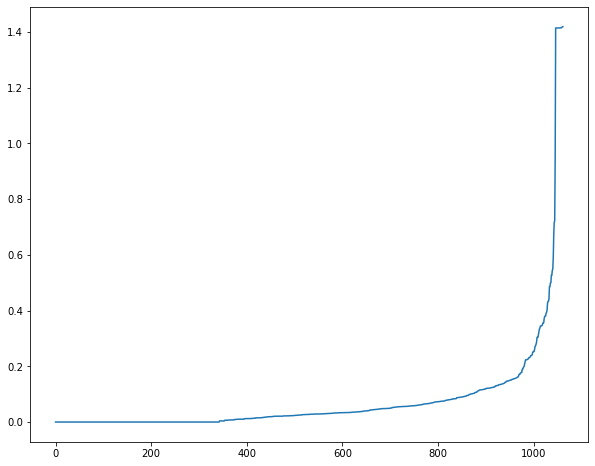

In [46]:
# Plot para encontrar el valor de eps más "optimo"

plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.show()

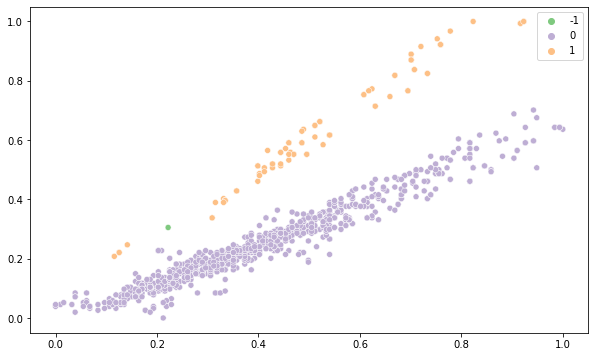

In [47]:

dbscan = DBSCAN(eps = 1.42, min_samples = 5)
dbscan.fit(X)

plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, -2], y = X[:, -3], hue = dbscan.labels_, palette = "Accent")
plt.show()

In [48]:
df.columns

Index(['MARCHAS', 'VEHICLECLASS_COMPACT', 'VEHICLECLASS_FULL-SIZE',
       'VEHICLECLASS_MID-SIZE', 'VEHICLECLASS_PICKUP TRUCK',
       'VEHICLECLASS_SPECIAL PURPOSE VEHICLE', 'VEHICLECLASS_STATION WAGON',
       'VEHICLECLASS_SUV', 'VEHICLECLASS_TWO-SEATER', 'VEHICLECLASS_VAN',
       'TRANSMISSION_A', 'TRANSMISSION_AM', 'TRANSMISSION_AS',
       'TRANSMISSION_AV', 'TRANSMISSION_M', 'FUELTYPE_D', 'FUELTYPE_E',
       'FUELTYPE_X', 'FUELTYPE_Z', 'ENGINESIZE', 'CYLINDERS',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS',
       'FUELCONSUMPTION_COMB_MPG_2'],
      dtype='object')

In [49]:
df["cluster_kmeans"] = kmeans.labels_
df["cluster_dbscan"] = dbscan.labels_

df

,MARCHAS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_PICKUP TRUCK,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON,VEHICLECLASS_SUV,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN,...,FUELTYPE_X,FUELTYPE_Z,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG_2,cluster_kmeans,cluster_dbscan
0,5,1,0,0,0,0,0,0,0,0,...,0,1,2.0,4,9.9,6.7,196,0.030303,0,0
1,6,1,0,0,0,0,0,0,0,0,...,0,1,2.4,4,11.2,7.7,221,0.034483,0,0
2,7,1,0,0,0,0,0,0,0,0,...,0,1,1.5,4,6.0,5.8,136,0.020833,0,0
3,6,0,0,0,0,0,0,1,0,0,...,0,1,3.5,6,12.7,9.1,255,0.040000,2,0
4,6,0,0,0,0,0,0,1,0,0,...,0,1,3.5,6,12.1,8.7,244,0.037037,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,6,0,0,0,0,0,0,1,0,0,...,1,0,3.0,6,13.4,9.8,271,0.041667,2,0
1063,6,0,0,0,0,0,0,1,0,0,...,1,0,3.2,6,13.2,9.5,264,0.040000,2,0
1064,6,0,0,0,0,0,0,1,0,0,...,1,0,3.0,6,13.4,9.8,271,0.041667,2,0
1065,6,0,0,0,0,0,0,1,0,0,...,1,0,3.2,6,12.9,9.3,260,0.040000,2,0


In [50]:
df["cluster_dbscan"].value_counts()

 0    970
 1     91
-1      1
Name: cluster_dbscan, dtype: int64

In [51]:
df[df["cluster_dbscan"]==-1].T

,318
MARCHAS,6
VEHICLECLASS_COMPACT,0
VEHICLECLASS_FULL-SIZE,0
VEHICLECLASS_MID-SIZE,1
VEHICLECLASS_PICKUP TRUCK,0
VEHICLECLASS_SPECIAL PURPOSE VEHICLE,0
VEHICLECLASS_STATION WAGON,0
VEHICLECLASS_SUV,0
VEHICLECLASS_TWO-SEATER,0
VEHICLECLASS_VAN,0


In [52]:
# Porque esta mejor la agrupacion  de Dbscam
df.drop("cluster_kmeans", axis =1, inplace=True)

In [53]:
df_0 = df[df["cluster_dbscan"]==0]
df_1 = df[df["cluster_dbscan"]==1]

In [54]:
# REGRESION LINEAL DEL GRUPO 0

X0 = np.asarray (df_0.drop("CO2EMISSIONS", axis=1))
y0 = np.asarray(df_0["CO2EMISSIONS"]).reshape(-1,1)

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Normalizacion de X
scaler_x0 = MinMaxScaler()
scaler_x0.fit(X0)
X0 = scaler_x0.transform(X0)


# Normalizacion de y
scaler_y0 = MinMaxScaler()
scaler_y0.fit(y0)
y0 = scaler_y0.transform(y0)

In [56]:
X0.shape, y0.shape

((970, 25), (970, 1))

In [57]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.30, random_state = 10)
 
print(f"Conjunto de Train: {X0_train.shape, X0_test.shape}")
print(f"Conjunto de Test: {y0_train.shape, y0_test.shape}")

Conjunto de Train: ((679, 25), (291, 25))
Conjunto de Test: ((679, 1), (291, 1))


In [58]:
#Coeficientes y la interseccion a las 2 rectas 
regresion_lineal0 = LinearRegression()
regresion_lineal0.fit(X0_train, y0_train)

 
print ("weights:", regresion_lineal0.coef_)
print ("w_0:", regresion_lineal0.intercept_)

weights: [[-8.90664729e-05 -4.69649971e+10 -4.69649971e+10 -4.69649971e+10
  -4.69649971e+10 -4.69649971e+10 -4.69649971e+10 -4.69649971e+10
  -4.69649971e+10 -4.69649971e+10 -2.57984063e+10 -2.57984063e+10
  -2.57984063e+10 -2.57984063e+10 -2.57984063e+10 -3.31392309e+11
  -1.10015861e+09 -3.31392309e+11 -3.31392309e+11 -7.79286610e-03
   5.40143421e-03  6.87722118e-01  3.52460055e-01  3.00818973e-02
   0.00000000e+00]]
w_0: [4.04155712e+11]


In [59]:
yhat0 = regresion_lineal0.predict(X0_test)

for i, j in zip(yhat0[:5], y0_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:[0.20574951] 	Valor real:[0.20900322]
Predicción:[0.36499023] 	Valor real:[0.36334405]
Predicción:[0.17047119] 	Valor real:[0.17041801]
Predicción:[0.45397949] 	Valor real:[0.45337621]
Predicción:[0.2456665] 	Valor real:[0.24437299]


In [60]:
RAE0 = np.sum(np.abs(np.subtract(y0_test, yhat0))) / np.sum(np.abs(np.subtract(y0_test, np.mean(y0_test))))

RSE0 = np.sum(np.square(np.subtract(y0_test, yhat0))) / np.sum(np.square(np.subtract(y0_test, np.mean(y0_test))))

r2_ajustada0 = 1 - (1 - regresion_lineal0.score(X0_test, y0_test))*(len(y0_test) - 1)/(len(y0_test) - X0_test.shape[1] - 1)

In [61]:
print(f"MAE:\t {mean_absolute_error(yhat0, y0_test)}")
print(f"MSE:\t {mean_squared_error(yhat0, y0_test)}")
print(f"R**2:\t {r2_score(yhat0, y0_test)}")
print(f"RAE:\t {RAE0}")
print(f"RSE:\t {RSE0}")
print(f"Adjusted R**2:\t {r2_ajustada0}")

MAE:	 0.0024190811179313687
MSE:	 1.4941791042221608e-05
R**2:	 0.9996385272154116
RAE:	 0.01460291165462988
RSE:	 0.0003603834616457467
Adjusted R**2:	 0.9996056180985763


In [62]:
df_pred = pd.DataFrame()

df_pred["y0_test"] = y0_test.flatten()
df_pred["yhat0"] = yhat0.flatten()

df_pred["diferencia 0"] = round(abs((df_pred["y0_test"] - df_pred["yhat0"]) / df_pred["y0_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia 0")

df_pred.head(20)

,y0_test,yhat0,diferencia 0
207,0.527331,0.527344,0.0024
215,0.437299,0.437317,0.0041
70,0.305466,0.305481,0.0048
157,0.533762,0.533813,0.0096
91,0.926045,0.926147,0.0111
169,0.926045,0.926147,0.0111
180,0.215434,0.215393,0.0190
33,0.858521,0.858337,0.0214
62,0.379421,0.379333,0.0231
142,0.591640,0.591492,0.0250


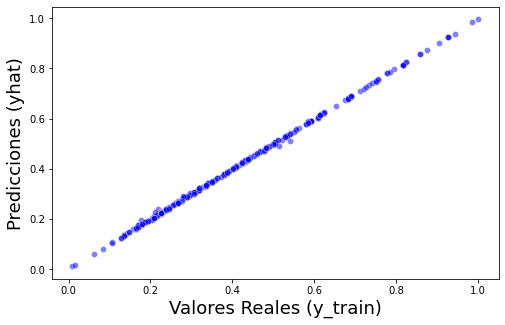

In [63]:
plt.figure(figsize = (8, 5))

sns.scatterplot(x = y0_test.flatten(), y = yhat0.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

In [64]:
# REGRESION LINEAL DEL GRUPO 1
X1 = np.asarray (df_1.drop("CO2EMISSIONS", axis=1))
y1 = np.asarray(df_1["CO2EMISSIONS"]).reshape(-1,1)

In [65]:


# Normalizacion de X
scaler_x1 = MinMaxScaler()
scaler_x1.fit(X1)
X1 = scaler_x1.transform(X1)


# Normalizacion de y
scaler_y1 = MinMaxScaler()
scaler_y1.fit(y1)
y1 = scaler_y1.transform(y1)

In [66]:
X1.shape, y1.shape

((91, 25), (91, 1))

In [67]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 10)
 
print(f"Conjunto de Train: {X1_train.shape, X1_test.shape}")
print(f"Conjunto de Test: {y1_train.shape, y1_test.shape}")

Conjunto de Train: ((63, 25), (28, 25))
Conjunto de Test: ((63, 1), (28, 1))


In [68]:
#Coeficientes y la interseccion a las 2 rectas 
regresion_lineal1 = LinearRegression()
regresion_lineal1.fit(X1_train, y1_train)

 
print ("weights:", regresion_lineal1.coef_)
print ("w_0:", regresion_lineal1.intercept_)

weights: [[ 5.62407618e-03  3.31095777e-04  4.79161218e-05  1.60459763e-03
  -1.48447574e-03  5.55111512e-17  2.77555756e-17 -1.08222674e-03
  -2.77555756e-17  5.83092956e-04 -2.35565750e-04  5.55111512e-17
   2.35565750e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.32126643e-02
  -7.85841734e-03  6.13734446e-01  3.60153826e-01  2.27485417e-02
   0.00000000e+00]]
w_0: [-0.0030873]


In [69]:
yhat1 = regresion_lineal1.predict(X1_test)

for i, j in zip(yhat1[:5], y1_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:[0.73023505] 	Valor real:[0.73306773]
Predicción:[0.68465646] 	Valor real:[0.68525896]
Predicción:[0.76644335] 	Valor real:[0.76494024]
Predicción:[0.38570559] 	Valor real:[0.38645418]
Predicción:[0.52633311] 	Valor real:[0.52589641]


In [70]:
RAE1 = np.sum(np.abs(np.subtract(y1_test, yhat1))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

RSE1 = np.sum(np.square(np.subtract(y1_test, yhat1))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

r2_ajustada1 = 1 - (1 - regresion_lineal1.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)

In [71]:
print(f"MAE:\t {mean_absolute_error(yhat1, y1_test)}")
print(f"MSE:\t {mean_squared_error(yhat1, y1_test)}")
print(f"R**2:\t {r2_score(yhat1, y1_test)}")
print(f"RAE:\t {RAE1}")
print(f"RSE:\t {RSE1}")
print(f"Adjusted R**2:\t {r2_ajustada1}")

MAE:	 0.0015104064623387068
MSE:	 3.7692154394211296e-06
R**2:	 0.9999214351515757
RAE:	 0.008606202955897039
RSE:	 7.884743654360594e-05
Adjusted R**2:	 0.998935559606661


In [72]:
df_pred1=pd.DataFrame()
df_pred1["y1_test"] = y1_test.flatten()
df_pred1["yhat1"] = yhat1.flatten()

df_pred1["diferencia 1"] = round(abs((df_pred1["y1_test"] - df_pred1["yhat1"]) / df_pred1["y1_test"] * 100), 4)

df_pred1 = df_pred1.sort_values("diferencia 1")

df_pred1.head(20)

,y1_test,yhat1,diferencia 1
8,0.406375,0.406406,0.0078
6,0.749004,0.748798,0.0275
9,0.490040,0.489658,0.0779
17,0.796813,0.796190,0.0782
7,0.796813,0.796190,0.0782
23,0.525896,0.526333,0.0830
21,0.525896,0.526333,0.0830
4,0.525896,0.526333,0.0830
25,0.525896,0.526333,0.0830
22,0.685259,0.684656,0.0879


# Metodos de Validacion

In [73]:
%%time

# DEBEMOS EMPEZAR POR LA 0

loo0 = LeaveOneOut()
yhat0 = list()

# EL for va a realizar 150 iteraciones porque es un total de 150 patrones

for train_index, test_index in loo0.split(X0): 
    X0_train, X0_test = X0[train_index], X0[test_index]
    y0_train, y0_test = y0[train_index], y0[test_index]
    
    # Modelo
   # model = neighbors.KNeighborsClassifier(17)
   # model.fit(X_train, y_train)
    model = LinearRegression()
    model.fit(X0_train, y0_train)
    #Ver Regresion lineal y Sustituir
    
    
    # Prediccion
    yhat01 = model.predict(X0_test)[0]
    yhat0.append(yhat01)

Wall time: 2.98 s


In [74]:
RAE0 = np.sum(np.abs(np.subtract(y0, yhat0))) / np.sum(np.abs(np.subtract(y0, np.mean(y0))))

RSE0 = np.sum(np.square(np.subtract(y0, yhat0))) / np.sum(np.square(np.subtract(y0, np.mean(y0))))

r2_ajustada0 = 1 - (1 - model.score(X0, y0))*(len(y0) - 1)/(len(y0) - X0.shape[1] - 1)

In [75]:
print(f"MAE:\t {mean_absolute_error(yhat0, y0)}")
print(f"MSE:\t {mean_squared_error(yhat0, y0)}")
print(f"R**2:\t {r2_score(yhat0, y0)}")
print(f"RAE:\t {RAE0}")
print(f"RSE:\t {RSE0}")
print(f"Adjusted R**2:\t {r2_ajustada0}")

MAE:	 0.0024724187383730984
MSE:	 1.741164236040396e-05
R**2:	 0.9995634061269484
RAE:	 0.015327887448818238
RSE:	 0.00043639388244844443
Adjusted R**2:	 0.9995854705687864


In [76]:
model0 = LinearRegression()
model0.fit(X0, y0)

LinearRegression()

In [77]:
%%time

# DEBEMOS EMPEZAR POR LA 0

loo1 = LeaveOneOut()
yhat1 = list()

# EL for va a realizar 150 iteraciones porque es un total de 150 patrones

for train_index, test_index in loo1.split(X1): 
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    
    # Modelo
   # model = neighbors.KNeighborsClassifier(17)
   # model.fit(X_train, y_train)
    model = LinearRegression()
    model.fit(X1_train, y1_train)
    #Ver Regresion lineal y Sustituir
    
    
    # Prediccion
    yhat11 = model.predict(X1_test)[0]
    yhat1.append(yhat11)

Wall time: 162 ms


In [78]:
RAE1 = np.sum(np.abs(np.subtract(y1, yhat1))) / np.sum(np.abs(np.subtract(y1, np.mean(y1))))

RSE1 = np.sum(np.square(np.subtract(y1, yhat1))) / np.sum(np.square(np.subtract(y1, np.mean(y1))))

r2_ajustada1 = 1 - (1 - model.score(X1, y1))*(len(y1) - 1)/(len(y1) - X1.shape[1] - 1)

In [79]:
print(f"MAE:\t {mean_absolute_error(yhat1, y1)}")
print(f"MSE:\t {mean_squared_error(yhat1, y1)}")
print(f"R**2:\t {r2_score(yhat1, y1)}")
print(f"RAE:\t {RAE1}")
print(f"RSE:\t {RSE1}")
print(f"Adjusted R**2:\t {r2_ajustada1}")

MAE:	 0.0014077767001399854
MSE:	 3.2207077586094863e-06
R**2:	 0.9999322575196076
RAE:	 0.008082634058290785
RSE:	 6.781300971747237e-05
Adjusted R**2:	 0.9999370982479593


In [80]:
model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression()

In [85]:
import pickle

with open("modelo_grupo0.sav", "wb") as file:
    pickle.dump(model0, file)
with open("modelo_grupo1.sav", "wb") as file:
    pickle.dump(model1, file)

In [86]:
with open("modelo_grupo0.sav", "rb") as file:
    model = pickle.load(file)

In [87]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}